In [1]:
import pickle

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def measure_response_variables(data,typ,speeds,dt,net = None):
    
    tmaxs = []
    tshifts = []
    ants = []
    vmaxs = []
    
    
    for speed in speeds:
        
        if net is None:
            response = data[typ][speed]
        else:
            print(net)
            response = data[typ][net][speed]

        t_bar = data['t_bar'][speed]
        
        t_max = np.argmax(response)*dt          # measure t_max
        
        t_shift = t_bar - t_max                   # measure peah shift
        
        ant = t_shift*speed                     # calculate anticipation
        
        v_max = np.max(response)                # measure max
        
        print(t_bar,t_max)
         
        tmaxs.append(t_max)
        tshifts.append(t_shift)
        ants.append(ant)
        vmaxs.append(v_max)
    
    return tmaxs,tshifts,ants,vmaxs


In [3]:
# load responses
# recify GC responses
import sys
sys.path.append("../lib") # add code library to paths
from nonlinearities import N as nonlin

slope = 5
threshold = 0


dt = 0.001
delta = 0.005
N = 256

speeds = np.round(np.arange(0.1,1.1,0.1),1)


data = {}
data['time'] = {}
data['vdrive'] = {}
data['stim'] = {}
data['t_bar'] = {}

data['bc'] = {}
data['bc']['recurrent'] = {}
data['bc']['forward'] = {}
data['bc']['pooling'] = {}

data['gc'] = {}
data['gc']['recurrent'] = {}
data['gc']['forward'] = {}
data['gc']['pooling'] = {}

data['antis_t'] = {}
data['antis_t']['vdrive'] = {}
data['antis_t']['bc_recurrent'] = {}
data['antis_t']['bc_forward'] = {}
data['antis_t']['bc_pooling'] = {}
data['antis_t']['gc_recurrent'] = {}
data['antis_t']['gc_forward'] = {}
data['antis_t']['gc_pooling'] = {}



data['antis_x'] = {}
data['antis_x']['vdrive'] = {}
data['antis_x']['bc_recurrent'] = {}
data['antis_x']['bc_forward'] = {}
data['antis_x']['bc_pooling'] = {}
data['antis_x']['gc_recurrent'] = {}
data['antis_x']['gc_forward'] = {}
data['antis_x']['gc_pooling'] = {}


data['maxis'] = {}
data['maxis']['vdrive'] = {}
data['maxis']['bc_recurrent'] = {}
data['maxis']['bc_forward'] = {}
data['maxis']['bc_pooling'] = {}
data['maxis']['gc_recurrent'] = {}
data['maxis']['gc_forward'] = {}
data['maxis']['gc_pooling'] = {}

for speed in speeds:

    stimname = f'bar_{speed}'

    # load stim 
    stim_bar = np.load(f'../output/recurrent_nn/{stimname}/stim_grid_{stimname}.npy')[N,:]
    time_bar = np.arange(0,stim_bar.shape[0])*dt
    t_bar = (N*delta)/speed                
    time_bar_centered = time_bar - t_bar

    data['time'][speed] = time_bar_centered
    data['stim'][speed] = stim_bar
    data['t_bar'][speed] = t_bar

    # load Vdrive
    forward_bar_stc = np.load(f'../output/forward_nn/{stimname}/stc_grid_{stimname}.npy')[N,:]

    data['vdrive'][speed] = forward_bar_stc

    # load responses
    recurrent_bar_sigB = np.load(f'../output/recurrent_nn/{stimname}/BC_grid_{stimname}.npy')[N,:]
    recurrent_bar_sigG = np.load(f'../output/recurrent_nn/{stimname}/GC_grid_{stimname}.npy')[N,:]
    recurrent_bar_sigG = np.array([nonlin(v,slope,threshold) for v in recurrent_bar_sigG])
    # recurrent_bar_sigG = recurrent_bar_sigG/recurrent_bar_sigG.max()
    
    data['bc']['recurrent'][speed] = recurrent_bar_sigB
    data['gc']['recurrent'][speed] = recurrent_bar_sigG

    forward_bar_sigB = np.load(f'../output/forward_nn/{stimname}/BC_grid_{stimname}.npy')[N,:]
    forward_bar_sigG = np.load(f'../output/forward_nn/{stimname}/GC_grid_{stimname}.npy')[N,:]
    forward_bar_sigG = np.array([nonlin(v,slope,threshold) for v in forward_bar_sigG])
    # forward_bar_sigG = forward_bar_sigG/forward_bar_sigG.max()

    data['bc']['forward'][speed] = forward_bar_sigB
    data['gc']['forward'][speed] = forward_bar_sigG


    pooling_bar_sigB = np.load(f'../output/pooling_nn/{stimname}/BC_grid_{stimname}.npy')[N,:]
    pooling_bar_sigG = np.load(f'../output/pooling_nn/{stimname}/GC_grid_{stimname}.npy')[N,:]
    pooling_bar_sigG = np.array([nonlin(v,slope,threshold) for v in pooling_bar_sigG])
    # pooling_bar_sigG = pooling_bar_sigG/pooling_bar_sigG.max()

    data['bc']['pooling'][speed] = pooling_bar_sigB
    data['gc']['pooling'][speed] = pooling_bar_sigG


x_,shift,ant,v_max = measure_response_variables(data,'vdrive',speeds,dt)
data['antis_t']['vdrive'] = shift
data['antis_x']['vdrive'] = ant
data['maxis']['vdrive'] = v_max


x_,shift,ant,v_max = measure_response_variables(data,'bc',speeds,dt,net = 'recurrent')
data['antis_t']['bc_recurrent'] = shift
data['antis_x']['bc_recurrent'] = ant
data['maxis']['bc_recurrent'] = v_max


x_,shift,ant,v_max = measure_response_variables(data,'bc',speeds,dt,net = 'forward')
data['antis_t']['bc_forward'] = shift
data['antis_x']['bc_forward'] = ant
data['maxis']['bc_forward'] = v_max


x_,shift,ant,v_max = measure_response_variables(data,'bc',speeds,dt,net = 'pooling')
data['antis_t']['bc_pooling'] = shift
data['antis_x']['bc_pooling'] = ant
data['maxis']['bc_pooling'] = v_max


x_,shift,ant,v_max = measure_response_variables(data,'gc',speeds,dt,net = 'recurrent')
data['antis_t']['gc_recurrent'] = shift
data['antis_x']['gc_recurrent'] = ant
data['maxis']['gc_recurrent'] = v_max


x_,shift,ant,v_max = measure_response_variables(data,'gc',speeds,dt,net = 'forward')
data['antis_t']['gc_forward'] = shift
data['antis_x']['gc_forward'] = ant
data['maxis']['gc_forward'] = v_max


x_,shift,ant,v_max = measure_response_variables(data,'gc',speeds,dt,net = 'pooling')
data['antis_t']['gc_pooling'] = shift
data['antis_x']['gc_pooling'] = ant
data['maxis']['gc_pooling'] = v_max


12.799999999999999 12.878
6.3999999999999995 6.4830000000000005
4.266666666666667 4.354
3.1999999999999997 3.2920000000000003
2.56 2.654
2.1333333333333333 2.228
1.8285714285714287 1.923
1.5999999999999999 1.693
1.4222222222222223 1.514
1.28 1.37
recurrent
12.799999999999999 12.588000000000001
recurrent
6.3999999999999995 5.995
recurrent
4.266666666666667 3.932
recurrent
3.1999999999999997 2.947
recurrent
2.56 2.366
recurrent
2.1333333333333333 1.984
recurrent
1.8285714285714287 1.713
recurrent
1.5999999999999999 1.51
recurrent
1.4222222222222223 1.352
recurrent
1.28 1.226
forward
12.799999999999999 12.878
forward
6.3999999999999995 6.4830000000000005
forward
4.266666666666667 4.354
forward
3.1999999999999997 3.2920000000000003
forward
2.56 2.654
forward
2.1333333333333333 2.228
forward
1.8285714285714287 1.923
forward
1.5999999999999999 1.694
forward
1.4222222222222223 1.514
forward
1.28 1.371
pooling
12.799999999999999 12.878
pooling
6.3999999999999995 6.4830000000000005
pooling
4.26

In [4]:

tau = 0.04 # seconds
sigma = 0.05 # mm

# calculate time to cross rf
def taucross(v,sigma):
    return sigma/v


tcrosses = [taucross(vi,sigma) for vi in speeds]


In [5]:
fontsize_legend = 20
fontsize_labels = 25
fontsize_panellabel = 30
fontsize_ticks = 20
lw = 3
ms = 60

figsize_ratio = 3

figsize = (8,8)
image_format = "png"
dpi = 300
panellabel_position = [-0.07, .85]


cbar = 'grey'

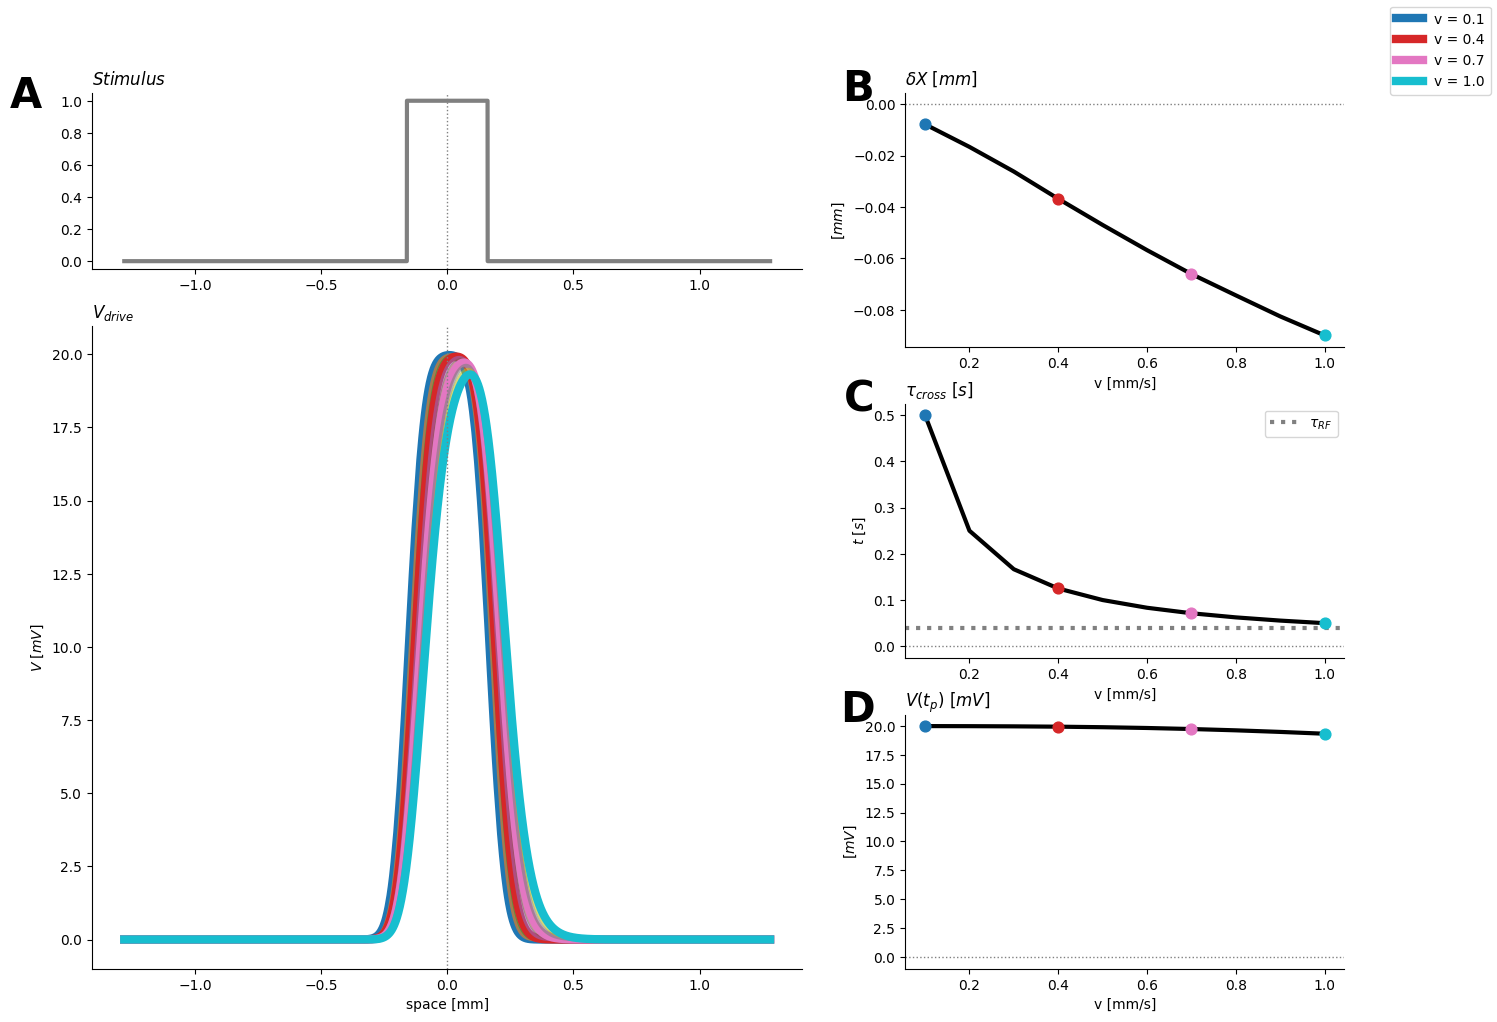

In [6]:
# OPL scaling supplementary figure 

colors = []
%matplotlib inline
#initialize figure
nrows = 12
ncols = 5

fig = plt.figure(figsize=(15,12))
fig.patch.set_facecolor('white')


fig.subplots_adjust(top=0.925,
bottom=0.195,
left=0.065,
right=0.9,
hspace=2.7,
wspace=0.61)

gs = fig.add_gridspec(nrows,ncols)


# Stimulus
ax = fig.add_subplot(gs[0:3,0:3])
sns.despine()
ax.set_title(r'$Stimulus$', loc = 'left')

ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "A", transform=ax.transAxes,
          fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')


x = 0.1
ti = data['time'][x]
stim = data['stim'][x]
ax.plot(ti*x,stim, linewidth = lw, color = cbar)
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')


# Vdrive vs space for may speeds
ax = fig.add_subplot(gs[3:,0:3], sharex = ax)
sns.despine()
ax.set_title(r'$V_{drive}$', loc = 'left')

for x,si in enumerate(speeds):
    
    
    ti = data['time'][si]*si
    RG = data['vdrive'][si]
    # plot every 3rd response in bold 
    if x%3 ==0:
        line = ax.plot(ti, RG, label = f'v = {np.round(si,2)}', linewidth = lw*2)
        colors.append(line[0].get_color())
    else:
        line = ax.plot(ti, RG, label = f'_v = {np.round(si,2)}', linewidth = lw, alpha = 0.6)
        colors.append(line[0].get_color())

    
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_xlabel('space [mm]')
ax.set_ylabel('$V$ [$mV$]')
# ax.set_xlim(-0.4,0.4)
fig.legend()



# t_cross
ax = fig.add_subplot(gs[4:8,3:])
sns.despine()
ax.set_title(r'$\tau_{cross}$ $[s]$', loc = 'left')

ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "C", transform=ax.transAxes,
          fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')

ax.axhline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.axhline(tau, linewidth = 3, color = cbar, linestyle = ':', label = r'$\tau_{RF}$')
ax.plot(speeds,tcrosses, color = 'k', linewidth = lw)
for x,si in enumerate(speeds):
    if x%3 ==0:
        p = ax.scatter(speeds[x],tcrosses[x], s= ms, zorder = 10, color = colors[x])

# ax.set_ylim(-.2,.15)
#ax.set_xscale('log')
ax.set_xlabel('v [mm/s]')
ax.set_ylabel(r'$t$ [$s$]')
ax.legend()



# delta X for Vdrive against speed 
ax = fig.add_subplot(gs[:4,3:])
sns.despine()
ax.set_title(r'$\delta X$ $[mm]$', loc = 'left')

ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "B", transform=ax.transAxes,
          fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')



ax.axhline(0, linewidth = 1, color = cbar, linestyle = ':')
antis = data['antis_x']['vdrive'] 

ax.plot(speeds,antis, color = 'k', linewidth = lw, label = 'lateral inhibition')
for x,si in enumerate(speeds[:]):
    if x%3 ==0:
        p = ax.scatter(speeds[x],antis[x], s= ms, zorder = 10, color = colors[x])
# ax.legend()


ax.set_xlabel('v [mm/s]')
ax.set_ylabel(r'[$mm$]')



# amplitude at peak
ax = fig.add_subplot(gs[8:,3:])
sns.despine()
ax.set_title(r'$V(t_p)$ $[mV]$', loc = 'left')


ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "D", transform=ax.transAxes,
          fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')


ax.axhline(0, linewidth = 1, color = cbar, linestyle = ':')
maxis = data['maxis']['vdrive']

ax.plot(speeds,maxis, color = 'k', linewidth = lw, label = 'lateral inhibition')
for x,si in enumerate(speeds[:]):
    if x%3 == 0:
        p = ax.scatter(speeds[x],maxis[x], s= ms, zorder = 10, color = colors[x])

ax.set_xlabel('v [mm/s]')
ax.set_ylabel(r'$[mV]$')



fig.savefig('../plots/Figure_S1.svg')

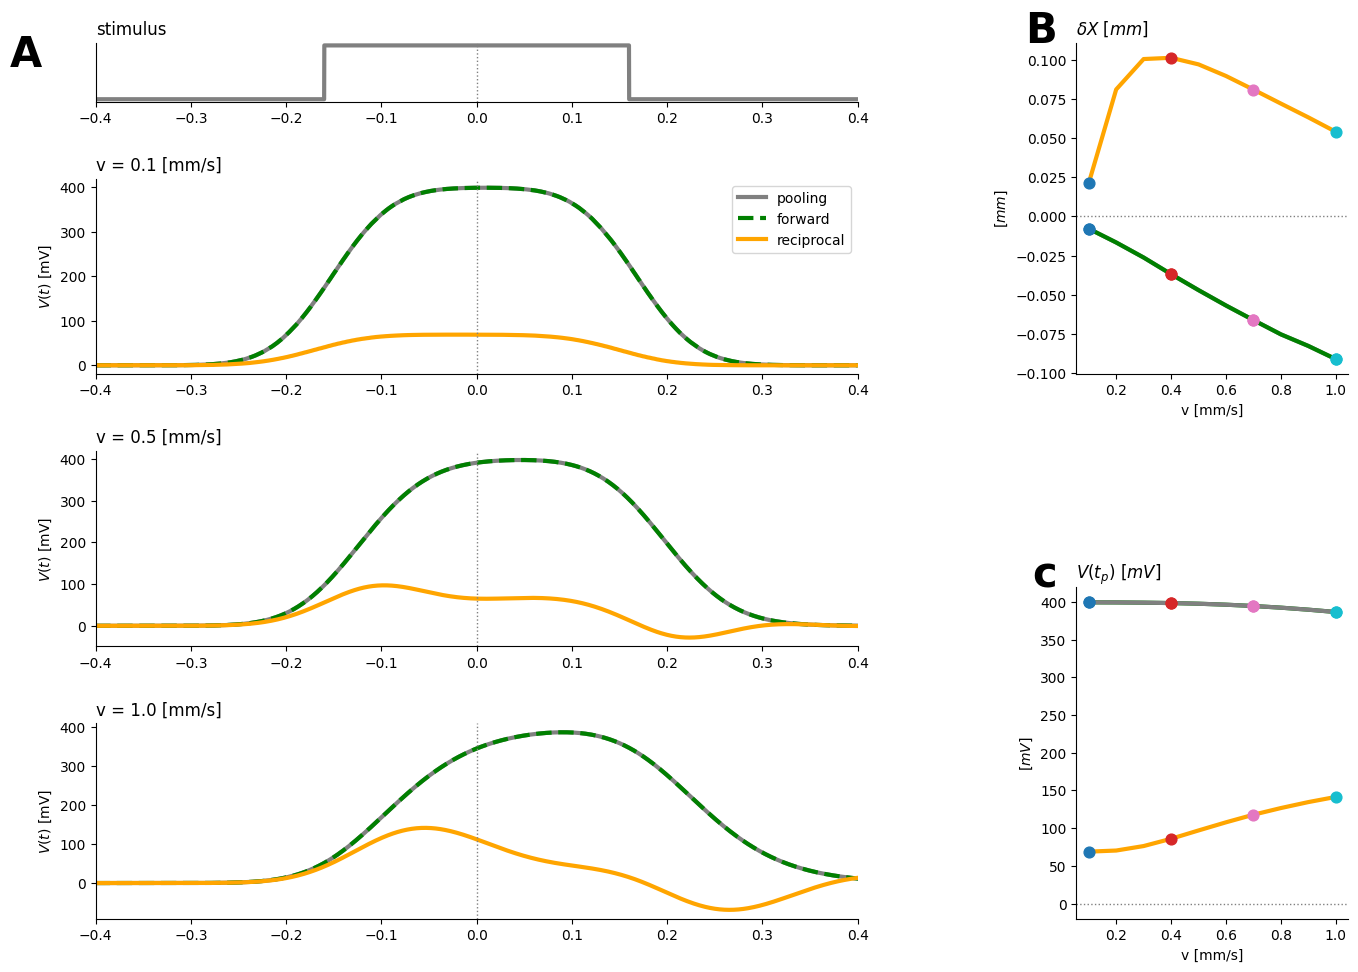

In [7]:
# speed scaling in  bipolar and ganglion cells in all 3 scenarios

#initialize figure
nrows = 7
ncols = 8

fig = plt.figure(figsize=(15,12))
fig.patch.set_facecolor('white')


fig.subplots_adjust(top=0.925,
bottom=0.195,
left=0.065,
right=0.9,
hspace=1.3,
wspace=.51)


gs = fig.add_gridspec(nrows,ncols)


# stimulus
ax = fig.add_subplot(gs[0,0:5])
sns.despine()
ax.set_title('stimulus', loc = 'left')
ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.30, "A", transform=ax.transAxes,
          fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')

x = 0.1
ti = data['time'][x]
stim = data['stim'][x]

ax.plot(ti*x, stim, linewidth = lw, color = cbar)
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_yticks([])



# BC resp speed 1
x = 0.1
ax = fig.add_subplot(gs[1:3,0:5], sharex = ax)
sns.despine()
ax.set_title(f'v = {x} [mm/s]', loc = 'left')


ti = data['time'][x]*x
cell = 'bc'
B_rec = data[cell]['recurrent'][x]
B_for = data[cell]['forward'][x]
B_pool = data[cell]['pooling'][x]
ax.plot(ti, B_pool, linewidth = lw, linestyle = '-', color = 'grey', label ='pooling')
ax.plot(ti, B_for, linewidth = lw, linestyle = '--', color = 'green', label = 'forward')
ax.plot(ti, B_rec, linewidth = lw, linestyle = '-', color = 'orange', label = 'reciprocal')
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_ylabel('$V(t)$ [mV]')
ax.set_xlim(-0.4,0.4)
ax.legend()



# BC resp speed 2
x = 0.5
ax = fig.add_subplot(gs[3:5,0:5], sharex = ax)
sns.despine()
ax.set_title(f'v = {x} [mm/s]', loc = 'left')

ti = data['time'][x]*x
B_rec = data[cell]['recurrent'][x]
B_for = data[cell]['forward'][x]
B_pool = data[cell]['pooling'][x]
ax.plot(ti, B_pool, linewidth = lw, linestyle = '-', color = 'grey', label ='_pooling')
ax.plot(ti, B_for, linewidth = lw, linestyle = '--', color = 'green', label = '_forward')
ax.plot(ti, B_rec, linewidth = lw, linestyle = '-', color = 'orange', label = '_reciprocal')
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_ylabel('$V(t)$ [mV]')
ax.set_xlim(-0.4,0.4)



# BC resp speed 3
x = 1.0
ax = fig.add_subplot(gs[5:,0:5], sharex = ax)
sns.despine()
ax.set_title(f'v = {x} [mm/s]', loc = 'left')

ti = data['time'][x]*x
B_rec = data[cell]['recurrent'][x]
B_for = data[cell]['forward'][x]
B_pool = data[cell]['pooling'][x]
ax.plot(ti, B_pool, linewidth = lw, linestyle = '-', color = 'grey', label ='_pooling')
ax.plot(ti, B_for, linewidth = lw, linestyle = '--', color = 'green', label = '_forward')
ax.plot(ti, B_rec, linewidth = lw, linestyle = '-', color = 'orange', label = '_reciprocal')
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_ylabel('$V(t)$ [mV]')
ax.set_xlim(-0.4,0.4)



# delta X for Vdrive against speed 
ax = fig.add_subplot(gs[:3,6:])
sns.despine()
ax.set_title(r'$\delta X$ $[mm]$', loc = 'left')

ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "B", transform=ax.transAxes,
          fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')



ax.axhline(0, linewidth = 1, color = cbar, linestyle = ':')
antis_r = data['antis_x'][f'{cell}_pooling'] 
ax.plot(speeds,antis_r, color = 'grey', linewidth = lw, label = '_recurrent')

antis_f = data['antis_x'][f'{cell}_forward']
ax.plot(speeds,antis_f, color = 'green', linewidth = lw, label = '_forward')

antis_p = data['antis_x'][f'{cell}_recurrent'] 
ax.plot(speeds,antis_p, color = 'orange', linewidth = lw, label = '_pooling')
for x,si in enumerate(speeds[:]):
    if x%3 ==0:
        p = ax.scatter(speeds[x],antis_r[x], s= ms, zorder = 10, color = colors[x])
        p = ax.scatter(speeds[x],antis_f[x], s= ms, zorder = 10, color = colors[x])
        p = ax.scatter(speeds[x],antis_p[x], s= ms, zorder = 10, color = colors[x])

ax.set_xlabel('v [mm/s]')
ax.set_ylabel(r'[$mm$]')


# amplitude at peak
ax = fig.add_subplot(gs[4:,6:])
sns.despine()
ax.set_title(r'$V(t_p)$ $[mV]$', loc = 'left')


ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "c", transform=ax.transAxes,
          fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')


ax.axhline(0, linewidth = 1, color = cbar, linestyle = ':')
maxis_r = data['maxis'][f'{cell}_recurrent'] 
maxis_f = data['maxis'][f'{cell}_forward'] 
maxis_p = data['maxis'][f'{cell}_pooling'] 

ax.plot(speeds,maxis_r, color = 'orange', linewidth = lw, label = '_recurrent')
ax.plot(speeds,maxis_f, color = 'green', linewidth = lw, label = '_forward')
ax.plot(speeds,maxis_p, color = 'grey', linewidth = lw, label = '_pooling')
for x,si in enumerate(speeds[:]):
    if x%3 == 0:
        p = ax.scatter(speeds[x],maxis_r[x], s= ms, zorder = 10, color = colors[x])
        p = ax.scatter(speeds[x],maxis_f[x], s= ms, zorder = 10, color = colors[x])
        p = ax.scatter(speeds[x],maxis_p[x], s= ms, zorder = 10, color = colors[x])

ax.set_xlabel('v [mm/s]')
ax.set_ylabel(r'$[mV]$')


fig.savefig('../plots/Figure_3.svg' )

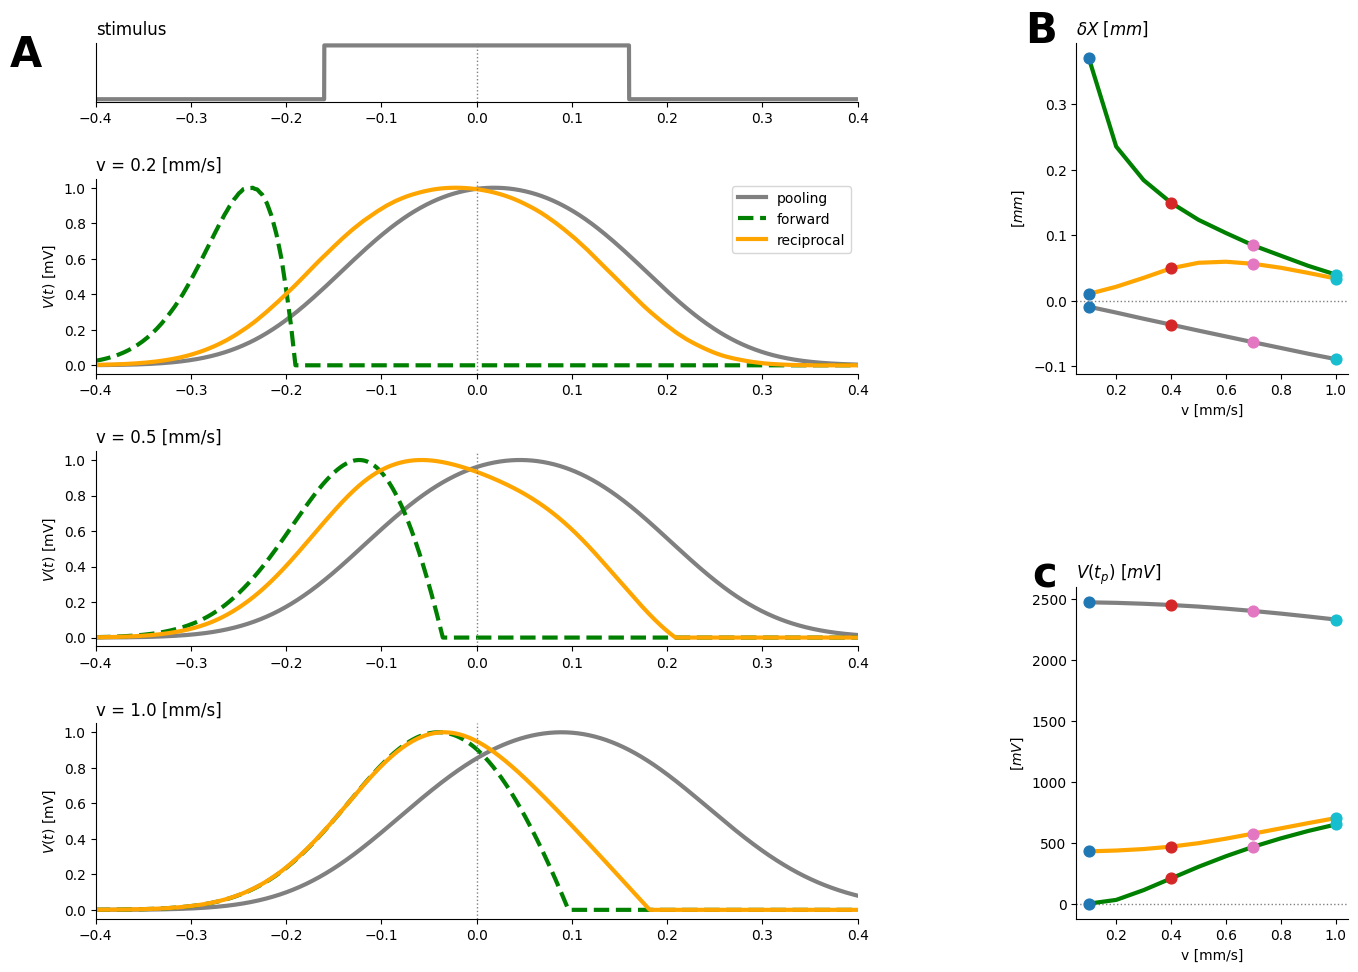

In [8]:
# speed scaling in  bipolar and ganglion cells in all 3 scenarios

#initialize figure
nrows = 7
ncols = 8

fig = plt.figure(figsize=(15,12))
fig.patch.set_facecolor('white')


fig.subplots_adjust(top=0.925,
bottom=0.195,
left=0.065,
right=0.9,
hspace=1.3,
wspace=.51)


gs = fig.add_gridspec(nrows,ncols)


# stimulus
ax = fig.add_subplot(gs[0,0:5])
sns.despine()
ax.set_title('stimulus', loc = 'left')
ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.30, "A", transform=ax.transAxes,
          fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')

x = 0.1
ti = data['time'][x]
stim = data['stim'][x]

ax.plot(ti*x, stim, linewidth = lw, color = cbar)
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_yticks([])


# BC resp speed 1
x = 0.2
ax = fig.add_subplot(gs[1:3,0:5], sharex = ax)
sns.despine()
ax.set_title(f'v = {x} [mm/s]', loc = 'left')


ti = data['time'][x]*x
cell = 'gc'
B_rec = data[cell]['recurrent'][x] / data[cell]['recurrent'][x].max()
B_for = data[cell]['forward'][x] / data[cell]['forward'][x].max()
B_pool = data[cell]['pooling'][x] / data[cell]['pooling'][x].max()

ax.plot(ti, B_pool, linewidth = lw, linestyle = '-', color = 'grey', label ='pooling')
ax.plot(ti, B_for, linewidth = lw, linestyle = '--', color = 'green', label = 'forward')
ax.plot(ti, B_rec, linewidth = lw, linestyle = '-', color = 'orange', label = 'reciprocal')
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_ylabel('$V(t)$ [mV]')
ax.set_xlim(-0.4,0.4)
ax.legend()


# BC resp speed 2
x = 0.5
ax = fig.add_subplot(gs[3:5,0:5], sharex = ax)
sns.despine()
ax.set_title(f'v = {x} [mm/s]', loc = 'left')

ti = data['time'][x]*x
B_rec = data[cell]['recurrent'][x] / data[cell]['recurrent'][x].max()
B_for = data[cell]['forward'][x] / data[cell]['forward'][x].max()
B_pool = data[cell]['pooling'][x] / data[cell]['pooling'][x].max()

ax.plot(ti, B_pool, linewidth = lw, linestyle = '-', color = 'grey', label ='_pooling')
ax.plot(ti, B_for, linewidth = lw, linestyle = '--', color = 'green', label = '_forward')
ax.plot(ti, B_rec, linewidth = lw, linestyle = '-', color = 'orange', label = '_reciprocal')
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_ylabel('$V(t)$ [mV]')
ax.set_xlim(-0.4,0.4)



# BC resp speed 3
x = 1.0
ax = fig.add_subplot(gs[5:,0:5], sharex = ax)
sns.despine()
ax.set_title(f'v = {x} [mm/s]', loc = 'left')

ti = data['time'][x]*x
B_rec = data[cell]['recurrent'][x] / data[cell]['recurrent'][x].max()
B_for = data[cell]['forward'][x] / data[cell]['forward'][x].max()
B_pool = data[cell]['pooling'][x] / data[cell]['pooling'][x].max()

ax.plot(ti, B_pool, linewidth = lw, linestyle = '-', color = 'grey', label ='_pooling')
ax.plot(ti, B_for, linewidth = lw, linestyle = '--', color = 'green', label = '_forward')
ax.plot(ti, B_rec, linewidth = lw, linestyle = '-', color = 'orange', label = '_reciprocal')
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_ylabel('$V(t)$ [mV]')
ax.set_xlim(-0.4,0.4)



# delta X for Vdrive against speed 
ax = fig.add_subplot(gs[:3,6:])
sns.despine()
ax.set_title(r'$\delta X$ $[mm]$', loc = 'left')

ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "B", transform=ax.transAxes,
          fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')



ax.axhline(0, linewidth = 1, color = cbar, linestyle = ':')
antis_r = data['antis_x'][f'{cell}_pooling'] 
ax.plot(speeds,antis_r, color = 'grey', linewidth = lw, label = '_recurrent')

antis_f = data['antis_x'][f'{cell}_forward']
ax.plot(speeds,antis_f, color = 'green', linewidth = lw, label = '_forward')

antis_p = data['antis_x'][f'{cell}_recurrent'] 
ax.plot(speeds,antis_p, color = 'orange', linewidth = lw, label = '_pooling')
for x,si in enumerate(speeds[:]):
    if x%3 ==0:
        p = ax.scatter(speeds[x],antis_r[x], s= ms, zorder = 10, color = colors[x])
        p = ax.scatter(speeds[x],antis_f[x], s= ms, zorder = 10, color = colors[x])
        p = ax.scatter(speeds[x],antis_p[x], s= ms, zorder = 10, color = colors[x])

ax.set_xlabel('v [mm/s]')
ax.set_ylabel(r'[$mm$]')


# amplitude at peak
ax = fig.add_subplot(gs[4:,6:])
sns.despine()
ax.set_title(r'$V(t_p)$ $[mV]$', loc = 'left')


ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "c", transform=ax.transAxes,
          fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')


ax.axhline(0, linewidth = 1, color = cbar, linestyle = ':')
maxis_r = data['maxis'][f'{cell}_recurrent'] 
maxis_f = data['maxis'][f'{cell}_forward'] 
maxis_p = data['maxis'][f'{cell}_pooling'] 

ax.plot(speeds,maxis_r, color = 'orange', linewidth = lw, label = '_recurrent')
ax.plot(speeds,maxis_f, color = 'green', linewidth = lw, label = '_forward')
ax.plot(speeds,maxis_p, color = 'grey', linewidth = lw, label = '_pooling')
for x,si in enumerate(speeds[:]):
    if x%3 == 0:
        p = ax.scatter(speeds[x],maxis_r[x], s= ms, zorder = 10, color = colors[x])
        p = ax.scatter(speeds[x],maxis_f[x], s= ms, zorder = 10, color = colors[x])
        p = ax.scatter(speeds[x],maxis_p[x], s= ms, zorder = 10, color = colors[x])

ax.set_xlabel('v [mm/s]')
ax.set_ylabel(r'$[mV]$')


fig.savefig('../plots/Figure_4.svg' )

In [9]:
# TODO add more speeds, change amplitude scale

In [14]:
# plot heatmap with preferred speed for parameter
import pandas as pd
netname = 'recurrent_nn'

# load df
stimname = 'bar'
df = pd.read_csv(f'../output/{netname}/grid_bar_peakshift.csv')



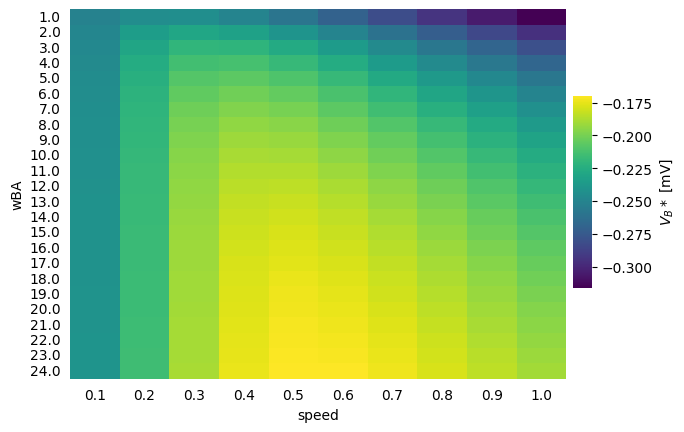

In [17]:
fig,ax = plt.subplots(1)

# plot heatmap for beta
cbar_ax = fig.add_axes([.91, .3, .03, .4])
heatmap = df.pivot_table(index = 'wBA',columns = 'speed',values = 'ant_B', aggfunc = 'mean')
coo = sns.heatmap(heatmap, cmap = 'viridis', ax = ax,  cbar_ax=cbar_ax,cbar_kws={'label': r'$V_{B}*$ [mV]'})
ax.tick_params(left=False, bottom=False)

